In [19]:
%matplotlib inline
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import scipy.stats as st
from IPython.display import Image


In [3]:
dataset_train = pd.read_csv('train.csv')
X = dataset_train.iloc[:, 1:11]
# print(X.head(3))
Y = dataset_train.iloc[:, 11]
X['climate_zone'] = X['Soil_Type'].astype(str).str[0] 
X['geologic'] = X['Soil_Type'].astype(str).str[1] 
X['soil'] = X['Soil_Type'] % 100
# X['soil'] = X['soil'].astype('category')
X['climate_zone'] = X['climate_zone'].astype('category')
X['geologic'] = X['geologic'].astype('category')
X = X.drop(columns =['Soil_Type'])

# X = X.drop(columns =['Aspect'])
# X = X.drop(columns =['Hillshade_3pm'])



# transformer = Normalizer().fit(X.iloc[:,[0,1,2,3,4,5,6,7,10]])
# X_norm = transformer.transform(X.iloc[:,0,1,2,3,4,5,6,7,10])
# X_norm = pd.DataFrame(X_norm)
# X_norm_full = pd.concat([X_norm,X.iloc[:,[8,9]]],axis =1)
# X = X_norm_full.values

scaler = StandardScaler().fit(np.array(X.iloc[:,[0,1,2,3,4,5,6,7,8,11]]))
# print(np.array(X.iloc[:,1:9]).shape)
X_std = scaler.transform(np.array(X.iloc[:,[0,1,2,3,4,5,6,7,8,11]]))
X_std = pd.DataFrame(X_std)
X_std_full = pd.concat([X_std,X.iloc[:,[9,10]]],axis = 1)
X_std_full = pd.get_dummies(X_std_full)

print(X_std_full.head(3))

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       3106     347      5                                42   
1       3132     121      1                                 0   
2       3255      69     13                               162   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               1                             1400   
1                               0                              466   
2                              16                              870   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm climate_zone geologic  soil  
0            210             231            160            7        2     2  
1            221             237            152            7        1     1  
2            233             214            110            7        7    56  
          0         1         2         3         4         5         6  \
0 -1.313926  1.322331 -1.264149 -1.238966 -0.798534  0.664024  0.066913

/Users/muzhouliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/muzhouliu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/muzhouliu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/Users/muzhouliu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


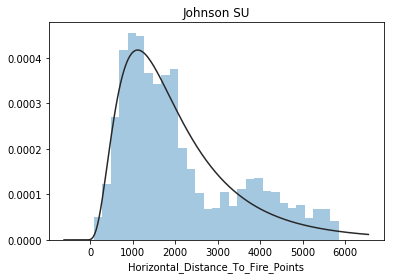

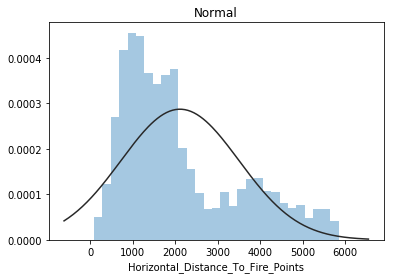

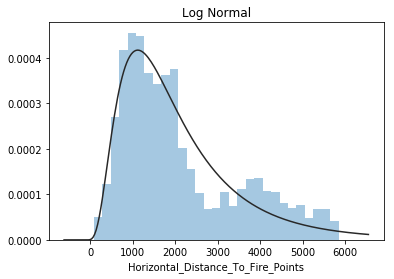

In [8]:
y = Y
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

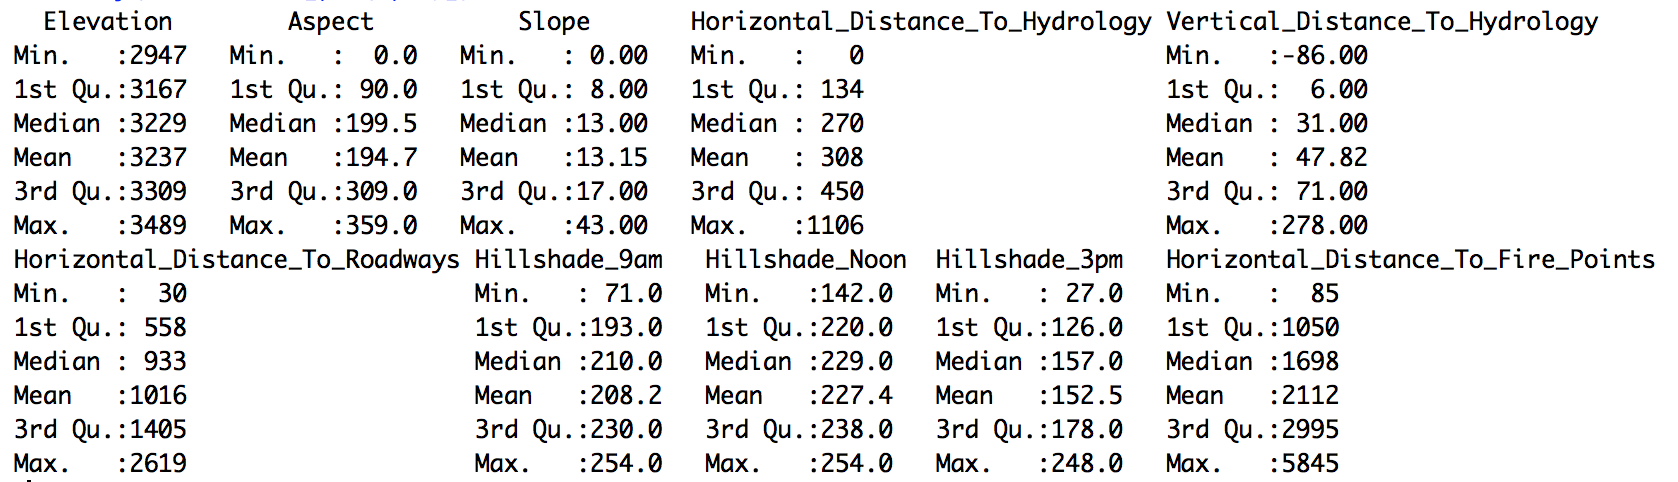

In [21]:
Image('WechatIMG10364.png')

/Users/muzhouliu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


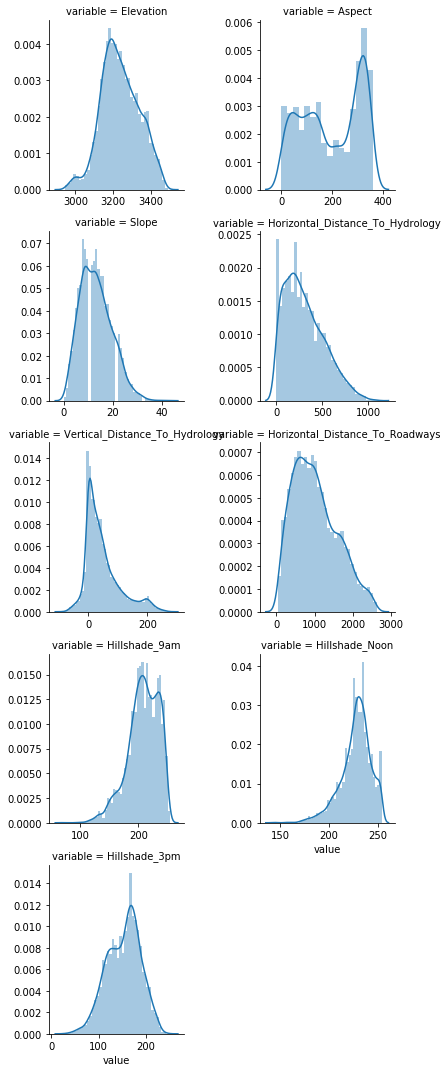

In [14]:
X_plot = dataset_train.iloc[:, 1:10]
features = [f for f in X_plot.columns ]
f = pd.melt(X_plot, value_vars=features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

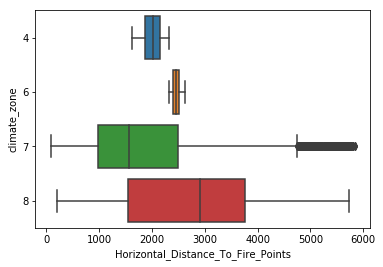

In [17]:
sns.boxplot(Y,X['climate_zone'])

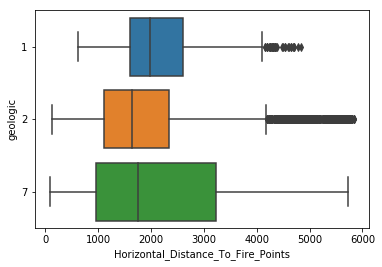

In [18]:
sns.boxplot(Y,X['geologic'])

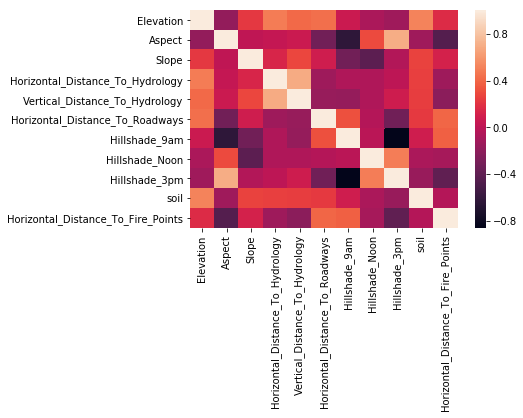

In [23]:
plt.figure(1)
corr = pd.concat([X,Y],axis=1).corr()
sns.heatmap(corr)